In [ ]:
# Import libraries
import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# 1.0 Treinamento
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0
# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant,
random_state=random_state )

In [49]:
#Divisao entre train, validacao e test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
X_train.size

32000

In [43]:
X_test.size

4000

In [44]:
X_val.size

4000

In [50]:
#Buscando melhor max_depth para o modelo
values = [i for i in range(1,61)]
val_score = list()
for i in values:
    model =  tr.DecisionTreeClassifier( max_depth=i )
    model.fit(X_train, y_train)
    model_pred = model.predict(X_val)
    acc_val = mt.accuracy_score( y_val, model_pred )
    val_score.append(acc_val)

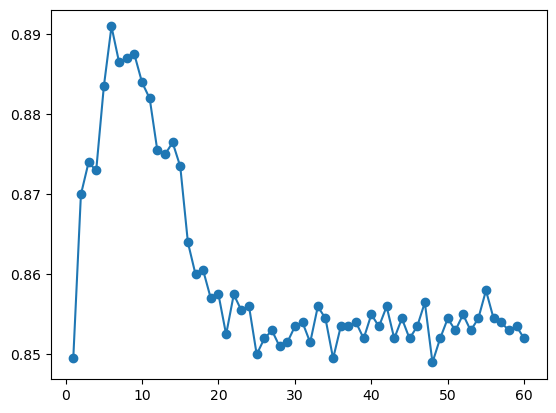

In [46]:
plt.plot(values, val_score, '-o')

In [51]:
best_depth = values[np.argmax(val_score)]
#testando com o validacao
model =  tr.DecisionTreeClassifier( max_depth=best_depth )
model.fit(X_train, y_train)
model_pred = model.predict(X_val)
acc_val = mt.accuracy_score( y_val, model_pred )
acc_val

0.891

In [52]:
#Tetando com o test, dados que nao foram vistos pelo modelo
model =  tr.DecisionTreeClassifier( max_depth=best_depth )
model.fit( np.concatenate( (X_train, X_val) ), np.concatenate((y_train, y_val)) )
model_pred = model.predict(X_test)
acc_val = mt.accuracy_score( model_pred, y_test )
acc_val

0.867